# Amazon and Flipkart Books - Price and Review Analysis

Amazon and Flipkart are the two leading E-commerece giants of India. Flipkart started its business in the year 2007 by selling books whereas amazon took its first steps in the indian market in the year 2012 by launching junglee.com(price comparision website) and later amazon's own online store, which also started by selling books mostly.

Flipkart did get an early headstart but the scenario is completely different now. A price analysis of some books being sold on both the platforms has been performed below to understand the competitive pricing done by the companies to maximise sales.

## Part 1 - Price comparision

A kaggle dataset from the year 2018 has been used for the analysis which cotains nearly 700 unique records of randomly selcted books. ISBN or the International Standard Book Number is a numeric commercial book identifier which is intended to be unique.An ISBN is assigned to each separate edition and variation of a publication.
This uniquness of the ISBN number has helped joining and comparing books on both the platforms.

Who doesn't like saving a few bucks while shopping online ? We either have a favourite online store where we prefer landing directly or we scroll on google and then land on the website offering the cheapest price. In the following analysis I will be finding out how much would a bookworm be saving if he or she buys the entire dataset in a year or two. 

In [115]:
#Importing the important libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [318]:
amazon = pd.read_csv('amazon.csv')
flipkart = pd.read_csv('flipkart.csv')

In [298]:
amazon.drop_duplicates(inplace=True)
amazon.head()

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209
1,The Boy in the Striped Pyjamas (Definitions),by John Boyne,4.6,134.0,1862305277,350
2,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156.0,9350294311,477
3,Mossad,by Michael Bar-Zohar - Import,4.6,637.0,8184958455,340
4,My Story,by Kamala Das,4.5,42.0,8172238975,178


In [299]:
amazon['amazon_price'].isnull().sum() #checking for null values in price column

0

In [242]:
amazon.shape

(709, 6)

In [243]:
#amazon.isnull().sum()

In [244]:
amazon.describe()

,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price
count,709.000000,709.000000,7.090000e+02,709.000000
mean,3.870240,277.279267,7.726101e+09,263.012694
std,0.466478,747.859566,2.696328e+09,155.363593
min,1.000000,1.000000,1.250006e+09,1.000000
25%,4.000000,23.000000,8.131733e+09,154.000000
50%,4.000000,67.000000,8.192911e+09,227.000000
75%,4.000000,196.000000,9.352704e+09,344.000000
max,5.000000,6566.000000,9.960900e+09,895.000000


In [245]:
flipkart.drop_duplicates(inplace=True)
flipkart.head()

,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
1,,1862305277,The Boy in the Striped Pyjamas,83,372,4.5
2,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,352,477,4.5
3,Bar-Zohar Michael,8184958455,Mossad,560,280,4.5
4,Kamala Das,8172238975,MY STORY,322,178,4.3


In [302]:
flipkart.shape

(1382, 6)

In [303]:
flipkart['flipkart_price'].isnull().sum() #checking for null values in price column

0

In [304]:
flipkart.describe()

,flipkart_isbn10,flipkart_price
count,1.382000e+03,1382.000000
mean,7.758529e+09,263.436324
std,2.643135e+09,210.164006
min,1.250006e+09,30.000000
25%,8.172235e+09,149.250000
50%,8.192911e+09,220.000000
75%,9.352865e+09,320.000000
max,9.960900e+09,5201.000000


#### Joining both the tables by using ISBN number

In [305]:
books=pd.merge(amazon,flipkart,how='outer',left_on='amazon_isbn-10',right_on='flipkart_isbn10')
books=books.drop_duplicates()

In [306]:
books.head()

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
6,The Boy in the Striped Pyjamas (Definitions),by John Boyne,4.6,134.0,1862305277,350,,1862305277,The Boy in the Striped Pyjamas,83,372,4.5
8,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156.0,9350294311,477,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,352,477,4.5
11,Mossad,by Michael Bar-Zohar - Import,4.6,637.0,8184958455,340,Bar-Zohar Michael,8184958455,Mossad,560,280,4.5
18,My Story,by Kamala Das,4.5,42.0,8172238975,178,Kamala Das,8172238975,MY STORY,322,178,4.3


We can drop some unnecessary columns now.

In [307]:
books.drop(columns=['flipkart_author','flipkart_title','flipkart_isbn10'],inplace=True)

In [308]:
books.rename({
    'amazon_title':'Book Title',
    'amazon_author':'Author',
    'amazon_isbn-10':'ISBN No.'
},axis=1,inplace=True)
books.set_index('ISBN No.',inplace=True)


In [129]:
books.head()

,Book Title,Author,amazon_rating,amazon_reviews count,amazon_price,flipkart_ratings count,flipkart_price,flipkart_stars
ISBN No.,,,,,,,,
8172234902,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,209,902,209,4.5
1862305277,The Boy in the Striped Pyjamas (Definitions),by John Boyne,4.6,134.0,350,83,372,4.5
9350294311,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156.0,477,352,477,4.5
8184958455,Mossad,by Michael Bar-Zohar - Import,4.6,637.0,340,560,280,4.5
8172238975,My Story,by Kamala Das,4.5,42.0,178,322,178,4.3


In [130]:
books[books['flipkart_price']>1000] 

,Book Title,Author,amazon_rating,amazon_reviews count,amazon_price,flipkart_ratings count,flipkart_price,flipkart_stars
ISBN No.,,,,,,,,
1409346455,Photography: The Definitive Visual History,by Tom Ang,5.0,2.0,1,2,1581,4.5
1506247598,5 Lb. Book of Gre Practice Problems (Manhattan...,by Manhattan Prep,4.6,151.0,1,,1799,
1260142655,"CISSP All-in-One Exam Guide, Eighth Edition",by Shon Harris - Import,3.7,11.0,4,,5201,
9352704339,Self-Assessment & Review Medicine (Part A & B)...,by Mudit Khanna,3.3,16.0,1,33,1235,4.5
9351524167,SRB’s Manual of Surgery,by Sriram Bhat M,3.9,33.0,1,58,1145,4.5


There are certain outliers that need to be removed as the costliest book in amazon dataset is only 895 Rs.

In [131]:
remove=books[books['flipkart_price']>1000].index.tolist()
books.drop(remove,inplace=True)

### Analysis

Text(0, 0.5, 'Number of Books')

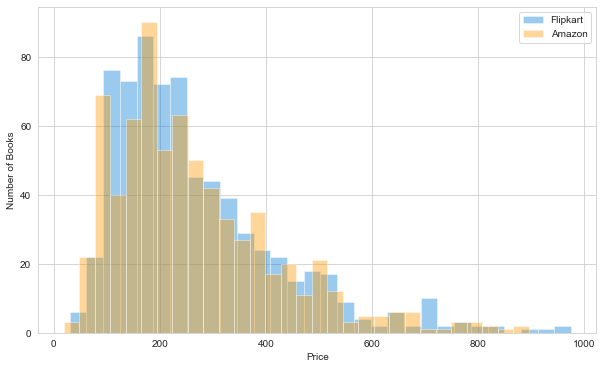

In [132]:
plt.figure(figsize=(10, 6))
sns.distplot(books['flipkart_price'], color='#047BD5', label="Flipkart",kde=False, bins=30,)
sns.distplot(books['amazon_price'], color='#FF9900', label="Amazon",kde=False, bins=30)


plt.legend()
plt.xlabel('Price')
plt.ylabel('Number of Books')

From the distribution of the prices on the two websites, we can see that there are some very distinct patterns starting with the spike in the range of 160-180 Rs

Creating two other columns for further study.

In [133]:
books['Price_difference']=books['flipkart_price']-books['amazon_price']
books['percent_difference']=-(books['Price_difference'])/books['flipkart_price']

In [134]:
books.head()

,Book Title,Author,amazon_rating,amazon_reviews count,amazon_price,flipkart_ratings count,flipkart_price,flipkart_stars,Price_difference,percent_difference
ISBN No.,,,,,,,,,,
8172234902,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,209,902,209,4.5,0,0.000000
1862305277,The Boy in the Striped Pyjamas (Definitions),by John Boyne,4.6,134.0,350,83,372,4.5,22,-0.059140
9350294311,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156.0,477,352,477,4.5,0,0.000000
8184958455,Mossad,by Michael Bar-Zohar - Import,4.6,637.0,340,560,280,4.5,-60,0.214286
8172238975,My Story,by Kamala Das,4.5,42.0,178,322,178,4.3,0,0.000000


In [258]:
books['Price_difference'].describe()

count    708.000000
mean       4.427966
std       57.390266
min     -218.000000
25%       -9.000000
50%        0.000000
75%       24.000000
max      367.000000
Name: Price_difference, dtype: float64

We see is a price difference maximum of 367 and a minimum of -218.
Lets find these books.

In [255]:
books[books['Price_difference']==books['Price_difference'].max()]

,Book Title,Author,amazon_rating,amazon_reviews count,amazon_price,flipkart_ratings count,flipkart_price,flipkart_stars,Price_difference,percent_difference,min_price
ISBN No.,,,,,,,,,,,
8131733661,"Hughes Electrical and Electronic Technology, 10e",by Hughes,4.2,30.0,328,189,695,4.4,367,-0.528058,328


In [256]:
books[books['Price_difference']==books['Price_difference'].min()]

,Book Title,Author,amazon_rating,amazon_reviews count,amazon_price,flipkart_ratings count,flipkart_price,flipkart_stars,Price_difference,percent_difference,min_price
ISBN No.,,,,,,,,,,,
1409323498,The Animal Book: A Visual Encyclopedia of Life...,by DK,4.8,19.0,781,5,563,4.6,-218,0.387211,563


Hence, We see that flipkart is charging 111.8 % extra compared to Amazon on "Hughes Electrical and Electronic Technology".
while Amazon is charging 38.7% extra on "The Animal Book: A Visual Encyclopedia of Life"
Yeah, absorb that !!

#### Distortion Plots

We can see more clearly that the mean is shifter away from 0 when the books that are at the same price are excluded. The graph clearly shows that flipkart is mostly charging more for the same book.

Text(0.5, 0, 'Price Difference')

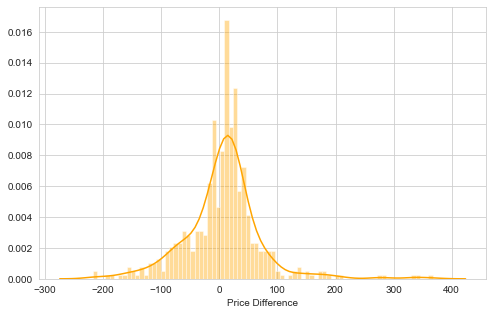

In [269]:
plt.figure(figsize=(8, 5))
sns.distplot(books['Price_difference'][books['Price_difference']!=0], color='orange', bins=80)
plt.xlabel('Price Difference')

A large number of books have same price.

Text(0.5, 0, 'Price Difference (Percentage)')

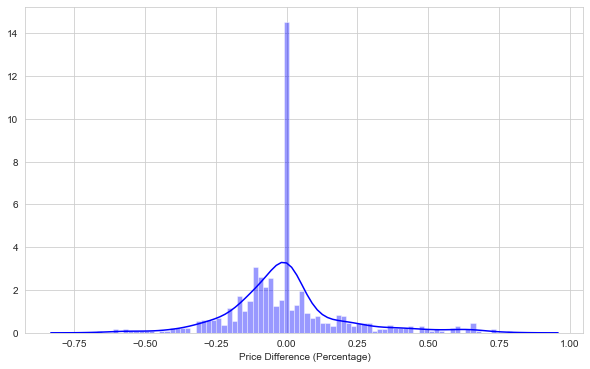

In [262]:
plt.figure(figsize=(10, 6))
sns.distplot(books['percent_difference'], color='blue', bins=80)
plt.xlabel('Price Difference (Percentage)')

#### The Frugal Mind
No! finding a cheaper price is not being stingy, Its called being smart

In [270]:
books['min_price']=None
for i in books.index:
    if books['amazon_price'][i]<=books['flipkart_price'][i]:
        books['min_price'][i]=books['amazon_price'][i]
    else:
        books['min_price'][i]=books['flipkart_price'][i]
        


In [271]:
print('Therefore an individual if buys all the books in the dataset only from Flipkart would spend Rs.{}'.format(books['flipkart_price'].sum()))
print('Whereas an individual if buys all the books in the dataset only from Amazon would spend Rs.{}\nHence saving Rs.{} on purchase'.format(books['amazon_price'].sum(),books['flipkart_price'].sum()-books['amazon_price'].sum()))

Therefore an individual if buys all the books in the dataset only from Flipkart would spend Rs.190490
Whereas an individual if buys all the books in the dataset only from Amazon would spend Rs.187355
Hence saving Rs.3135 on purchase


#### So Amazon is the cheapest option ?

In [272]:
print('Instead of buying only from amazon, a person buying smartly from both websites would save Rs. {} \non purchase of all books in the dataset'.format(books['amazon_price'].sum()-books['min_price'].sum()))

Instead of buying only from amazon, a person buying smartly from both websites would save Rs. 10346 
on purchase of all books in the dataset


In [276]:
cart=[('Flipkart Buyer',books['flipkart_price'].sum()),('Amazon Buyer',books['amazon_price'].sum()),('Smart Buyer',books['min_price'].sum())]
cart_df=pd.DataFrame(cart,columns=['Buyer','Spending'])

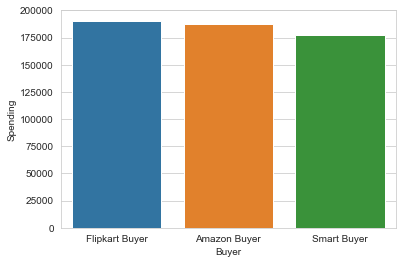

In [277]:
ax = sns.barplot(x='Buyer', y="Spending", data=cart_df)

In [280]:
no_diff = books[books['Price_difference'] == 0].count()[0]/books.shape[0]
print('Percentage of books which are priced the same: {0:.2f}%'.format(no_diff*100))

amz = books[books['Price_difference'] > 0].count()[0]/books.shape[0]
print('Better priced on Amazon: {0:.2f}%'.format(amz*100))

flp = books[books['Price_difference'] < 0].count()[0]/books.shape[0]
print('Better priced on Flipkart: {0:.2f}%'.format(flp*100))

Percentage of books which are priced the same: 25.14%
Better priced on Amazon: 45.06%
Better priced on Flipkart: 29.80%


#### How much would one overpay if buying only from

In [282]:
print('Flipkart: {0:.2f}%'.format((100*(books['flipkart_price'].sum() - books['min_price'].sum())/books['min_price'].sum())))
print()
print('Amazon: {0:.2f}%'.format((100*(books['amazon_price'].sum() - books['min_price'].sum())/books['min_price'].sum())))

Flipkart: 7.62%

Amazon: 5.84%


<AxesSubplot:>

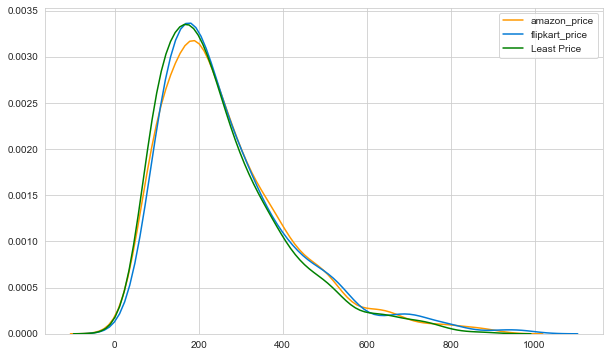

In [279]:
plt.figure(figsize=(10, 6))
sns.kdeplot(books['amazon_price'], color='#FF9900')
sns.kdeplot(books['flipkart_price'], color='#047BD5')
sns.kdeplot(books['min_price'], color='green', label='Least Price')

Clearly Amazon wins this battle of books.

## Part 2 - Wordcloud Sentiment Analysis

We always come across situations when we wish to buy a product but are unable to decide whether to buy or not because its not rated 4+ stars but then its also not rated 1 star. So we start reading some reviews but then there are thousands of them !! Whom to trust ??

In this part of the analysis we shall be classifying reviews as positive, negative or neutral by means of VADER classification tool by calculating compound score for each review.

For that we will be selecting an average rated book with review count more than 1000 from the above used dataset. 

In [310]:
amazon=amazon.drop_duplicates()
amazon.isnull().sum()

amazon_title            0
amazon_author           0
amazon_rating           4
amazon_reviews count    4
amazon_isbn-10          0
amazon_price            0
dtype: int64

In [332]:
amazon=amazon.dropna()
amazon=amazon.drop_duplicates()

In [319]:
amazon['amazon_rating'].unique()

array(['4.4', '4.6', '4.5', '4.1', '3.5', '3.8', '4.2', '3.7', '4.3',
       '4.7', '3.9', '5.0', '4.8', '4.0', '4.9', '2.0', '3.6',
       '4.5 out of 5 stars', '4.3 out of 5 stars', '4.6 out of 5 stars',
       '4.2 out of 5 stars', '4.4 out of 5 stars', '4.1 out of 5 stars',
       '4.0 out of 5 stars', '4.7 out of 5 stars', '3.6 out of 5 stars',
       '5.0 out of 5 stars', '1.4', '3.3', '3.0', '1.0', '3.4', '3.1',
       nan, '3.2', '2.4'], dtype=object)

Ratings need to be converted to float data type

In [324]:
rating_n=[]
for i in amazon['amazon_rating']:
    if type(i)==str:
        if len(i)>3:
            rating_n.append(i[0:3])
        else:
            rating_n.append(i)
    else:
        rating_n.append(i)
amazon['amazon_rating']=[float(x) for x in rating_n] 

In [325]:
amazon['amazon_reviews count']=amazon['amazon_reviews count'].str.replace(r',','')            

amazon['amazon_reviews count']=[float(x) for x in amazon['amazon_reviews count']] 
       

Applying our search criteria to find a book for review analysis.

In [333]:
amazon[(amazon['amazon_rating']<4) & (amazon['amazon_rating']>3.5) & (amazon['amazon_reviews count']>1000)]

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price
8,Making India Awesome: New Essays and Columns,by Chetan Bhagat,3.8,1188.0,8129137429,100
129,One Indian Girl,Chetan Bhagat,3.6,4929.0,8129142147,96


###### Unfortunately we'll have to chose a Chetan Bhagat book

### Making India Awesome

For this analysis the review data of this book has been scraped using Chrome scraper extention.

Importing required libraries

In [345]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings("ignore")

In [346]:
review = pd.read_csv('indiacb.csv')
review.head()


,Asin,UserName,Rating,Subject,ReviewDate,Review
0,8129137429,Ovn,2.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n The only reason wh...,Reviewed in India on 7 October 2017,\n\n\n\n\n\n\n\n\n\n \n \n \n Let's see ...
1,8129137429,amz cus,1.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n first this is not ...,Reviewed in India on 4 May 2018,\n\n\n\n\n\n\n\n\n\n \n \n \n chetan bag...
2,8129137429,Varun Shah,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n A weakipedia of wh...,Reviewed in India on 22 June 2018,\n\n\n\n\n\n\n\n\n\n \n \n \n . Making I...
3,8129137429,janmejay thakker,2.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n He is a good story...,Reviewed in India on 26 December 2015,\n\n\n\n\n\n\n\n\n\n \n \n \n He is a go...
4,8129137429,Amazon Customer,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Must read book for...,Reviewed in India on 27 January 2020,\n\n\n\n\n\n\n\n\n\n \n \n \n Very nice ...


### Cleaning up the data

In [336]:
for i in range(len(review)):
    review['Rating'][i]=int(review['Rating'][i][0])
    

s=review['Subject'].str.findall(r'[a-z0-9A-Z]+')
v=[]
for i in s:
    v.append(' '.join(i))
review['Subject']=v 


s=review['Review'].str.findall(r'[a-z0-9A-Z]+')
v=[]
for i in s:
    v.append(' '.join(i))
review['Review']=v 

s=review['ReviewDate'].str.findall(r'(\d{1,2})?[ -]?(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z\.\,]*[ -](\d{4})')
v=[]
for i in s:
    v.append(' '.join(i[0]))
review['ReviewDate']=v  
    

In [199]:
review.head()

,Asin,UserName,Rating,Subject,ReviewDate,Review
0,8129137429,Ovn,2,The only reason why I bought this was because ...,7 Oct 2017,Let s see what I could have spend my bad inves...
1,8129137429,amz cus,1,first this is not a novel,4 May 2018,chetan bagat i bought this after reading 2stat...
2,8129137429,Varun Shah,5,A weakipedia of what ails us and how to cure o...,22 Jun 2018,Making India Awesome is an exceptional manual ...
3,8129137429,janmejay thakker,2,He is a good storyteller but has been left no ...,26 Dec 2015,He is a good storyteller but has been left no ...
4,8129137429,Amazon Customer,4,Must read book for every teenager,27 Jan 2020,Very nice book good compilation and thought pr...


Better!!

In [337]:

# VADER sentiment analysis tool for getting Compound score.
def sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    return score

# VADER sentiment analysis tool for getting pos, neg and neu.
def sentimental_Score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0.5:
        return 'pos'
    elif (score > -0.5) and (score < 0.5):
        return 'neu'
    elif score <= -0.5:
        return 'neg'

In [338]:
review['Sentiment_Score']=review['Review'].apply(lambda x: sentimental_Score(x))


In [339]:
pos = review.loc[review['Sentiment_Score'] == 'pos']
neg = review.loc[review['Sentiment_Score'] == 'neg']

In [340]:
def stemming(tokens):
    ps=nltk.WordNetLemmatizer()
    stem_words=[]
    for x in tokens:
        stem_words.append(ps.lemmatize(x))
    return stem_words

In [341]:
def create_Word_Corpus(df):
    words_corpus = ''
    for val in df["Review"]:
        text = val.lower()
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = stemming(tokens)
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [342]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='k', bbox_inches='tight')

In [343]:
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

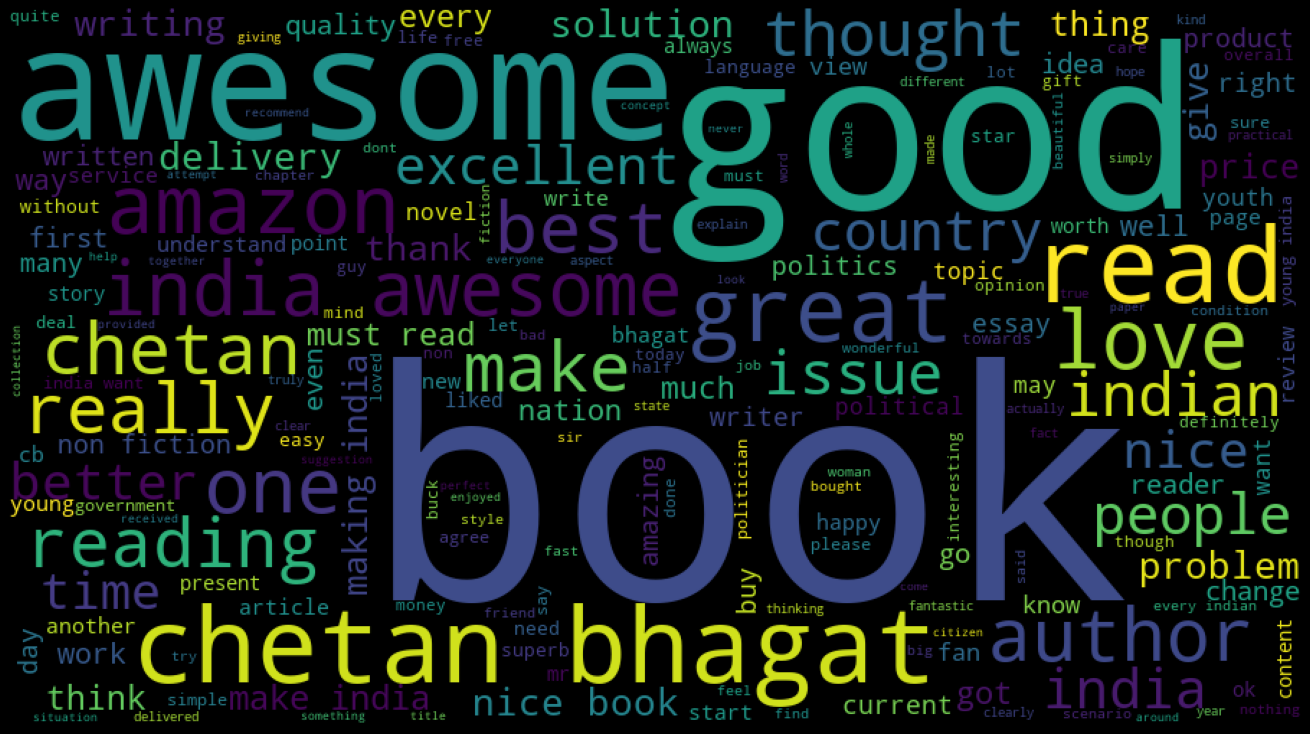

<Figure size 432x288 with 0 Axes>

In [344]:
plot_Cloud(pos_wordcloud)

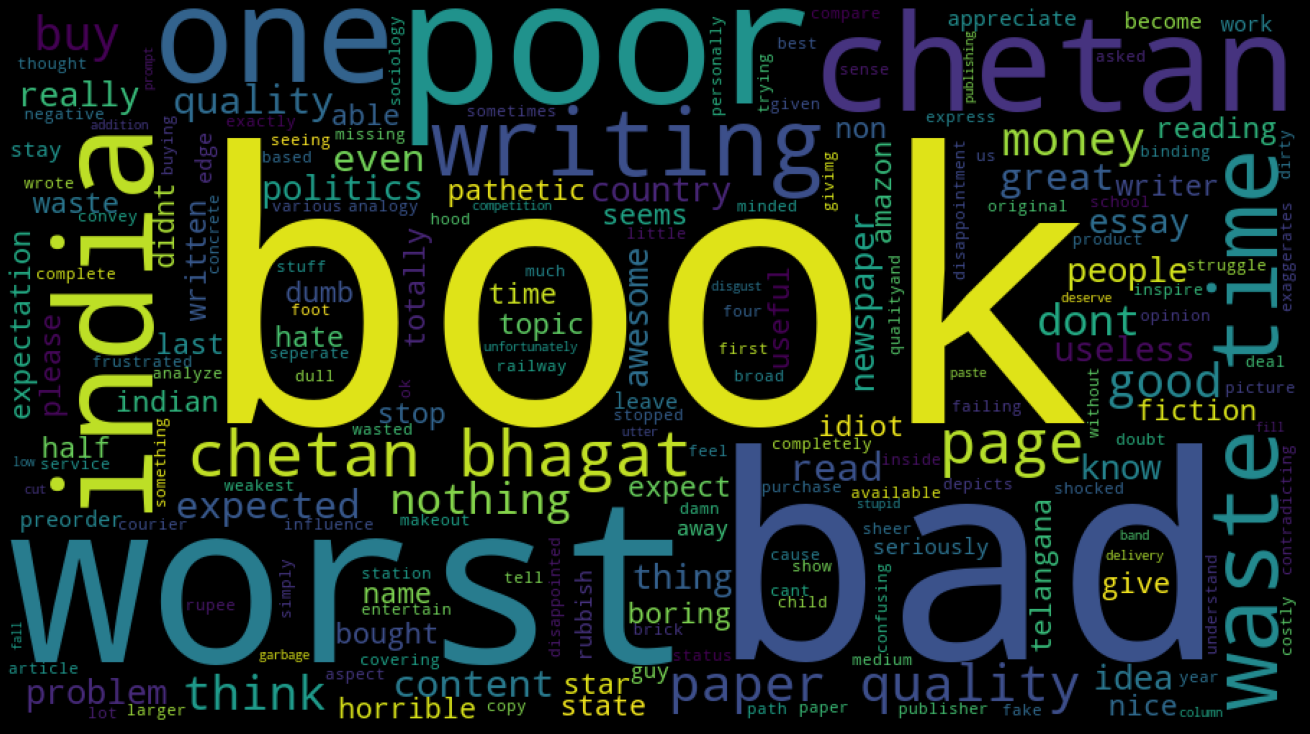

<Figure size 432x288 with 0 Axes>

In [230]:
plot_Cloud(neg_wordcloud)
